In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pysolar
import math
from cycler import cycler
%matplotlib notebook

from scipy import optimize



C:\ProgramData\Anaconda\envs\py3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda\envs\py3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")

Bad key "legend.isaxes" on line 313 in
C:\Users\Alton\.matplotlib\stylelib\tufte.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
matplotlib.style.available

['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'meter-blue',
 'tufte']

In [3]:
matplotlib.style.use('grayscale')

# Import In-Situ Data

In [4]:
def from_scratch():
    filepath = 'C:\\Users\\Alton\\Dropbox (DDI)\\BYU Turf Grass Monitoring Project\\BYU sensor data\\recent data\\'
    ndvi_df = pd.read_excel(filepath + 'Device-BYU-NDVI (5G0F4447).xls', na_values='***', index_col=0)
    pri_df = pd.read_excel(filepath + 'Device-BYU-PRI (5G0F4476).xls', na_values='***', index_col=0)
    swsoil_df = pd.read_excel(filepath + 'Device-BYUL25IV (5G0E3584).xls', na_values='***', index_col=0)#L25IV
    sesoil_df = pd.read_excel(filepath + 'Device-BYUL24VI (5G0E3579).xls', na_values='***', index_col=0)#L24VI
    nwsoil_df = pd.read_excel(filepath + 'Device-BYUS3VII (5G0E3585).xls', na_values='***', index_col=0)#S3VII
    nesoil_df = pd.read_excel(filepath + 'Device-BYU-S2V (5G0E3576).xls', na_values='***', index_col=0)#S2v
    weather_df = pd.read_excel(filepath + 'Device-BYU-HANS (5G0E4037).xls', na_values='***', index_col=0)#HANS

    for x in [swsoil_df, ndvi_df, pri_df,
              sesoil_df,
              nwsoil_df,
              nesoil_df,
              weather_df]:
        x.index = pd.to_datetime(x.index)
    
    
    ndvi_df.columns = ['SRS-Ni 630 nm',
                       'SRS-Ni 800 nm',
                       'S SRS-Pr 532 nm',
                       'S SRS-Pr 570 nm',
                       'S SRS-Nr 630 nm',
                       'S SRS-Nr 800 nm']
    pri_df.columns = ['SRS-Pi 532 nm',
                      'SRS-Pi 570 nm',
                      'N SRS-Pr 532 nm',
                      'N SRS-Pr 570 nm',
                      'N SRS-Nr 630 nm',
                      'N SRS-Nr 800 nm']
    swsoil_df.columns = ['SW 6cm EC mS/cm', 
                         'SW 6cm Temp °C',
                         'SW 6cm Volumetric Water Content m³/m³',
                         'SW 6cm Water Potential kPa',
                         'SW 6cm Temp °C',
                         'SW 15cm EC mS/cm',
                         'SW 15cm Temp °C',
                         'SW 15cm Volumetric Water Content m³/m³',
                         'SW 15cm Water Potential kPa',
                         'SW 15cm Temp °C',
                         'SW 30cm EC  mS/cm',
                         'SW 30cm Temp °C',
                         'SW 30cm Volumetric Water Content m³/m³']
    sesoil_df.columns = ['SE 6cm EC mS/cm', 
                         'SE 6cm Temp °C',
                         'SE 6cm Volumetric Water Content m³/m³',
                         'SE 6cm Water Potential kPa',
                         'SE 6cm Temp °C',
                         'SE 15cm EC mS/cm',
                         'SE 15cm Temp °C',
                         'SE 15cm Volumetric Water Content m³/m³',
                         'SE 15cm Water Potential kPa',
                         'SE 15cm Temp °C',
                         'SE 30cm EC  mS/cm',
                         'SE 30cm Temp °C',
                         'SE 30cm Volumetric Water Content m³/m³',
                         'SE negative potential']
    #Remove unneeded column
    sesoil_df = sesoil_df[['SE 6cm EC mS/cm', 
                         'SE 6cm Temp °C',
                         'SE 6cm Volumetric Water Content m³/m³',
                         'SE 6cm Water Potential kPa',
                         'SE 6cm Temp °C',
                         'SE 15cm EC mS/cm',
                         'SE 15cm Temp °C',
                         'SE 15cm Volumetric Water Content m³/m³',
                         'SE 15cm Water Potential kPa',
                         'SE 15cm Temp °C',
                         'SE 30cm EC  mS/cm',
                         'SE 30cm Temp °C',
                         'SE 30cm Volumetric Water Content m³/m³']]
    nwsoil_df.columns = ['NW 6cm EC mS/cm', 
                         'NW 6cm Temp °C',
                         'NW 6cm Volumetric Water Content m³/m³',
                         'NW 6cm Water Potential kPa',
                         'NW 6cm Temp °C',
                         'NW 15cm EC mS/cm',
                         'NW 15cm Temp °C',
                         'NW 15cm Volumetric Water Content m³/m³',
                         'NW 15cm Water Potential kPa',
                         'NW 15cm Temp °C',
                         'NW 30cm EC  mS/cm',
                         'NW 30cm Temp °C',
                         'NW 30cm Volumetric Water Content m³/m³']
    nesoil_df.columns = ['NE 6cm EC mS/cm', 
                         'NE 6cm Temp °C',
                         'NE 6cm Volumetric Water Content m³/m³',
                         'NE 6cm Water Potential kPa',
                         'NE 6cm Temp °C',
                         'NE 15cm EC mS/cm',
                         'NE 15cm Temp °C',
                         'NE 15cm Volumetric Water Content m³/m³',
                         'NE 15cm Water Potential kPa',
                         'NE 15cm Temp °C',
                         'NE 30cm EC  mS/cm',
                         'NE 30cm Temp °C',
                         'NE 30cm Volumetric Water Content m³/m³',
                         'NE negative potential 1',
                         'NE negative potential 2']
    #Remove two unneeded columns
    nesoil_df = nesoil_df[['NE 6cm EC mS/cm', 
                         'NE 6cm Temp °C',
                         'NE 6cm Volumetric Water Content m³/m³',
                         'NE 6cm Water Potential kPa',
                         'NE 6cm Temp °C',
                         'NE 15cm EC mS/cm',
                         'NE 15cm Temp °C',
                         'NE 15cm Volumetric Water Content m³/m³',
                         'NE 15cm Water Potential kPa',
                         'NE 15cm Temp °C',
                         'NE 30cm EC  mS/cm',
                         'NE 30cm Temp °C',
                         'NE 30cm Volumetric Water Content m³/m³']]
    weather_df.columns = ['VP-3 Humidity RH',
                          'VP-3 Temp °C',
                          'PYR Solar Radiation W/m²', 
                          'ECRN-100 Precipitation mm',
                          'DS-2 Direction °',
                          'DS-2 Max Gust m/s',
                          'DS-2 Average Wind m/s']

    
    df = ndvi_df.join(pri_df.join(swsoil_df.join(sesoil_df.join(nesoil_df.join(nwsoil_df.join(weather_df, how='outer'), how='outer'), how='outer'), how='outer'), how='outer'), how='outer')

    timeseries = pd.Series(df.index.values,df.index.values)

    latitude = 40.245198
    longitude = -111.641748

    zenithangles = pd.Series([90.0-pysolar.solar.get_altitude(latitude,longitude,x) for x in timeseries.tz_localize('Etc/GMT+6')],timeseries.index)

    df['Solar Zenith Angle']=zenithangles
    df['N NDVI'] = ((df['N SRS-Nr 800 nm']/df['SRS-Ni 800 nm'])
              -(df['N SRS-Nr 630 nm']/df['SRS-Ni 630 nm'])
             )/((df['N SRS-Nr 800 nm']/df['SRS-Ni 800 nm'])
                +(df['N SRS-Nr 630 nm']/df['SRS-Ni 630 nm']))
    df['S NDVI'] = ((df['S SRS-Nr 800 nm']/df['SRS-Ni 800 nm'])
              -(df['S SRS-Nr 630 nm']/df['SRS-Ni 630 nm'])
             )/((df['S SRS-Nr 800 nm']/df['SRS-Ni 800 nm'])
                +(df['S SRS-Nr 630 nm']/df['SRS-Ni 630 nm']))
    df['N PRI'] = ((df['N SRS-Pr 532 nm']/df['SRS-Pi 532 nm'])
              -(df['N SRS-Pr 570 nm']/df['SRS-Pi 570 nm'])
             )/((df['N SRS-Pr 532 nm']/df['SRS-Pi 532 nm'])
              +(df['N SRS-Pr 570 nm']/df['SRS-Pi 570 nm']))
    df['S PRI'] = ((df['S SRS-Pr 532 nm']/df['SRS-Pi 532 nm'])
              -(df['S SRS-Pr 570 nm']/df['SRS-Pi 570 nm'])
             )/((df['S SRS-Pr 532 nm']/df['SRS-Pi 532 nm'])
              +(df['S SRS-Pr 570 nm']/df['SRS-Pi 570 nm']))
    
    #pri_alpha = 0.91
    #ndvi_alpha = 1.27
    #
    #df['N alpha NDVI'] = (ndvi_alpha*df['N SRS-Nr 800 nm']-df['N SRS-Nr 630 nm'])/(ndvi_alpha*df['N SRS-Nr 800 nm']+df['N SRS-Nr 630 nm'])
    #df['S alpha NDVI'] = (ndvi_alpha*df['S SRS-Nr 800 nm']-df['S SRS-Nr 630 nm'])/(ndvi_alpha*df['S SRS-Nr 800 nm']+df['S SRS-Nr 630 nm'])
    #df['N alpha PRI'] = (pri_alpha*df['N SRS-Pr 532 nm']-df['N SRS-Pr 570 nm'])/(pri_alpha*df['N SRS-Pr 532 nm']+df['N SRS-Pr 570 nm'])
    #df['S alpha PRI'] = (pri_alpha*df['S SRS-Pr 532 nm']-df['S SRS-Pr 570 nm'])/(pri_alpha*df['S SRS-Pr 532 nm']+df['S SRS-Pr 570 nm'])
    df.to_excel(filepath + 'Turf Grass All WRC focus.xls')
    return df

In [5]:
def from_saved():
    filepath = 'C:\\Users\\Alton\\Dropbox (DDI)\\BYU Turf Grass Monitoring Project\\BYU sensor data\\recent data\\'
    df = pd.read_excel(filepath + 'Turf Grass All WRC focus.xls')
    return df

In [6]:
#df = from_scratch()
df = from_saved()

In [7]:
et = pd.read_excel('C:\\Users\\Alton\\Dropbox (DDI)\\BYU Turf Grass Monitoring Project\\BYU sensor data\\recent data\\Daily ET.xlsx')

In [8]:
et = et.dropna().set_index('Date')

In [9]:
df = df.replace('***',np.nan)

In [10]:
formatter=matplotlib.dates.DateFormatter('%b %Y')
monthlocator=matplotlib.dates.MonthLocator()
weeklocator=matplotlib.dates.WeekdayLocator(byweekday=7)

# Van Genuchten Model

In [11]:
def van_genuchten_wc(potential,th_r,th_s,alpha,n):
    wc = th_r+((th_s-th_r)/((1+(alpha*np.abs(potential))**n)**(1-1/n)))
    return wc

# Import HYPROP Data

In [12]:
filepath = 'C:\\Users\\Alton\\Dropbox (DDI)\\BYU Turf Grass Monitoring Project\\BYU sensor data\\recent data\\Pullman HYPROP\\'
se5 = pd.read_excel(filepath+'Southeast 5 cm (with VWC).xlsx',sheetname='Evaluation-Retention Θ(pF)',parse_cols='I,J')
se15 = pd.read_excel(filepath+'Southeast 15 cm (with VWC).xlsx',sheetname='Evaluation-Retention Θ(pF)',parse_cols='I,J')
sc5 = pd.read_excel(filepath+'South Center 5 cm (with VWC).xlsx',sheetname='Evaluation-Retention Θ(pF)',parse_cols='I,J')
sc15 = pd.read_excel(filepath+'South Center 15 cm (with VWC).xlsx',sheetname='Evaluation-Retention Θ(pF)',parse_cols='I,J')
nw5 = pd.read_excel(filepath+'Northwest 5 cm (with VWC).xlsx',sheetname='Evaluation-Retention Θ(pF)',parse_cols='I,J')
nw15 = pd.read_excel(filepath+'Northwest 15 cm (with VWC).xlsx',sheetname='Evaluation-Retention Θ(pF)',parse_cols='I,J')

#nw5
#nw15

In [13]:
s_hy_byu = pd.read_excel('C:\\Users\\Alton\\Dropbox (DDI)\\BYU Turf Grass Monitoring Project\\BYU sensor data\\recent data\\BYU HYPROP\\160331_Turf Plot 1 (South Plot).xlsx',sheetname='Evaluation-Retention Θ(pF)',parse_cols='I,J')
s_wp_byu = pd.read_excel('C:\\Users\\Alton\\Dropbox (DDI)\\BYU Turf Grass Monitoring Project\\BYU sensor data\\recent data\\BYU HYPROP\\160331_Turf Plot 1 (South Plot).xlsx',sheetname='WP4C Data',parse_cols='F,G',skip_footer=2)


In [14]:
def get_text_from_figure(figure):
    texts = []
    for x in figure.get_default_bbox_extra_artists():
        if type(x) is matplotlib.text.Text:
            texts.append(x)
    return texts

def apply_meter_blue(figure):
    meter_blue = '#03528a'
    meter_fifty = '#98adc7'
    meter_thirty = '#c0cbde'
    for ax in fig.get_axes():
        ax.tick_params(axis='both',which='both',top=False,right=False,color=meter_thirty)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    for x in get_text_from_figure(fig):
        x.set_color(meter_blue)

<IPython.core.display.Javascript object>


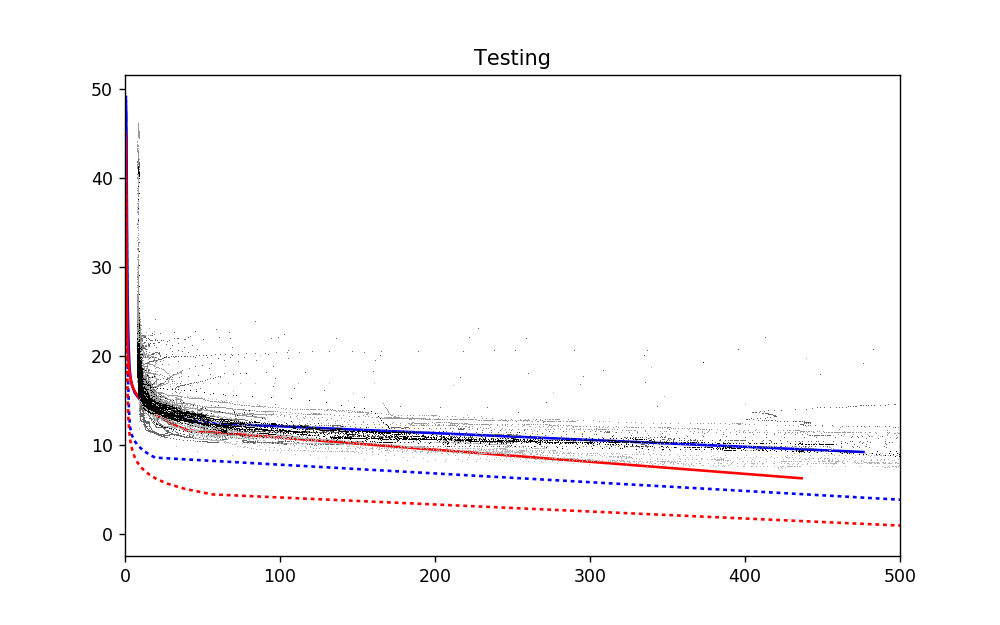

In [73]:
fig = plt.figure(num=22,figsize=(8,5))
ax1 = fig.add_subplot(111)
ax1.plot(sc5['Water Potential [kPa]'],sc5['Water Content [Vol%]'],'b-')
ax1.plot(sc15['Water Potential [kPa]'],sc15['Water Content [Vol%]'],'b:')
ax1.plot(se5['Water Potential [kPa]'],se5['Water Content [Vol%]'],'r-')
ax1.plot(se15['Water Potential [kPa]'],se15['Water Content [Vol%]'],'r:')
#ax1.plot(s_hy_byu['kPa'],s_hy_byu['Vol %'],'o')
ax1.plot(-s_wp_byu['Water Potential (MPa)']*1000,100*s_wp_byu['Actual Water Content (%)'],'o')

ax1.plot(-df['SE 6cm Water Potential kPa'],df['SE 6cm Volumetric Water Content m³/m³']*100,',')
ax1.plot(-df['SE 15cm Water Potential kPa'],df['SE 15cm Volumetric Water Content m³/m³']*100,',')
ax1.plot(-df['SW 6cm Water Potential kPa'],df['SW 6cm Volumetric Water Content m³/m³']*100,',')
ax1.plot(-df['SW 15cm Water Potential kPa'],df['SW 15cm Volumetric Water Content m³/m³']*100,',')

ax1.set_xlim(0,500)
ax1.set_title('Testing')
#ax1.set_xscale('log')
#apply_meter_blue(fig)

<IPython.core.display.Javascript object>


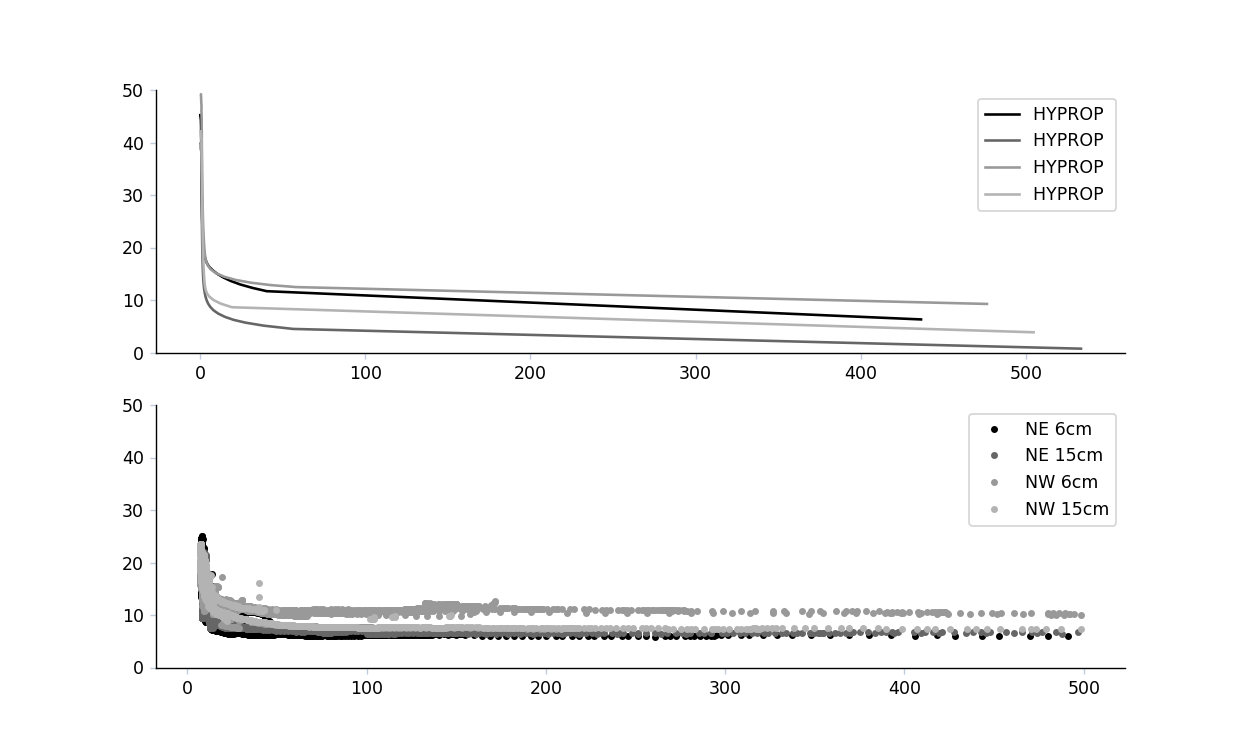

In [15]:
fig = plt.figure(num=1,figsize=(10,6))

ax1 = fig.add_subplot(211)
for location in [se5,se15,sc5,sc15]:
    x = location['Water Potential [kPa]']
    y = location['Water Content [Vol%]']
    ax1.plot(x,y,label='HYPROP ')
    
ax2 = fig.add_subplot(212)
for location in ['NE','NW']:
    for depth in ['6cm','15cm']:
        wetter_than_kPa = -df[location+' '+depth+' Water Potential kPa'] < 500
        hysteresis = (df[location+' '+depth+' Water Potential kPa'].diff() <= 0) #| (df[location+ depth+' Volumetric Water Content m³/m³'].diff() <= 0)
        x = -df[location+' '+depth+' Water Potential kPa'][wetter_than_kPa & hysteresis]#['2015']
        y = 100*df[location+' '+depth+' Volumetric Water Content m³/m³'][wetter_than_kPa & hysteresis]#['2015']
        ax2.plot(x,y,'.',label=location+' '+depth)
               
for ax in fig.get_axes():
    #ax.set_xscale('log')
    #ax.set_title('Axes Title or AXES TITLE')
    ax.legend()
    ax.set_ylim(0,50)
#fig.tight_layout()

apply_meter_blue(fig)

# Southeast 5cm

<IPython.core.display.Javascript object>


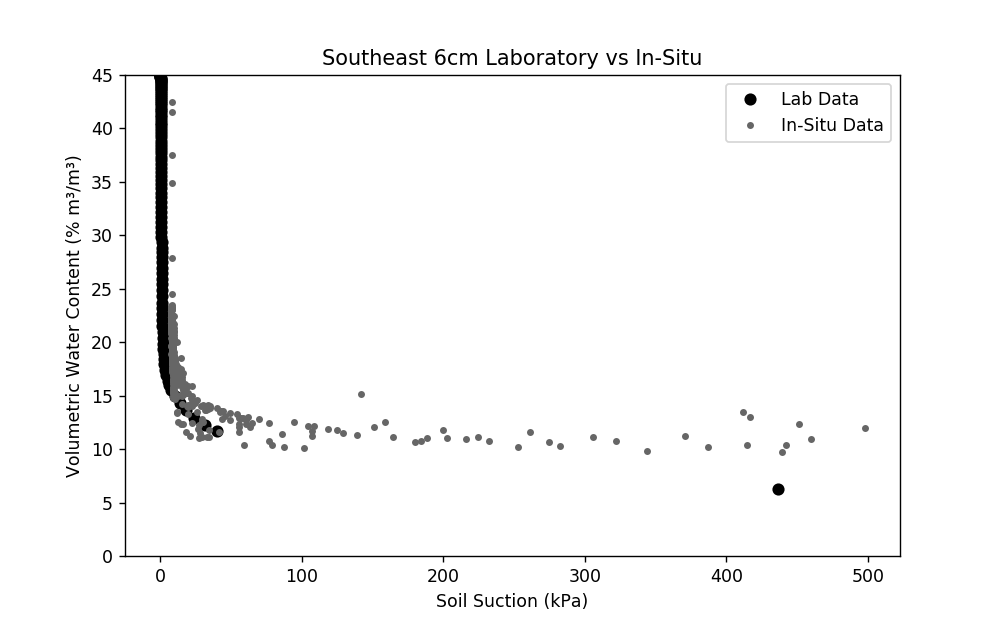

In [27]:
fig = plt.figure(num=2,figsize=(8,5))
fig.set_label('Southeast 6cm Laboratory vs In-Situ')
ax1 = fig.add_subplot(111)
ax1.set_title('Southeast 6cm Laboratory vs In-Situ')
ax1.set_xlabel('Soil Suction (kPa)')
ax1.set_ylabel('Volumetric Water Content (% m³/m³)')
ax1.plot(se5['Water Potential [kPa]'],se5['Water Content [Vol%]'],'o',label='Lab Data')
wetter_than_kPa = -df['SE 6cm Water Potential kPa'] < 500
hysteresis = (df['SE 6cm Water Potential kPa'].diff() <= 0)
x = -df['SE 6cm Water Potential kPa'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()#.replace([np.inf,-np.inf],np.nan).dropna()
y = 100*df['SE 6cm Volumetric Water Content m³/m³'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()#.replace([np.inf,-np.inf],np.nan).dropna()
ax1.plot(x,y,'.',label='In-Situ Data')

#dummy_x = np.linspace(.001,500,300)
#
#HYPROP_params, HYPROP_covs = optimize.curve_fit(van_genuchten_wc,se5['Water Potential [kPa]'],se5['Water Content [Vol%]'],maxfev=100000)
#ax1.plot(dummy_x,van_genuchten_wc(dummy_x,*HYPROP_params),label='HYPROP Van Genuchten Fit')
#
#in_situ_params, in_situ_covs = optimize.curve_fit(van_genuchten_wc,x,y,maxfev=100000)
#ax1.plot(dummy_x,van_genuchten_wc(dummy_x,*in_situ_params),label='In-Situ Van Genuchten Fit')

#ax1.set_xscale('log')
ax1.set_ylim(0,45)
ax1.legend()
#apply_meter_blue(fig)

#print(HYPROP_params,in_situ_params)


#fig.savefig('C:\\Users\\Alton\\Desktop\\test_savefig.png')
#fig.savefig('C:\\Users\\Alton\\Desktop\\China Presentation Figures\\SE 5cm MRC.pdf')

#fig.savefig('C:\\Users\\Alton\\Desktop\\test_savefig.emf')
#fig.savefig('C:\\Users\\Alton\\Desktop\\test_savefig.ps')
#fig.savefig('C:\\Users\\Alton\\Desktop\\test_savefig.svg')

# Southeast 15cm

<IPython.core.display.Javascript object>


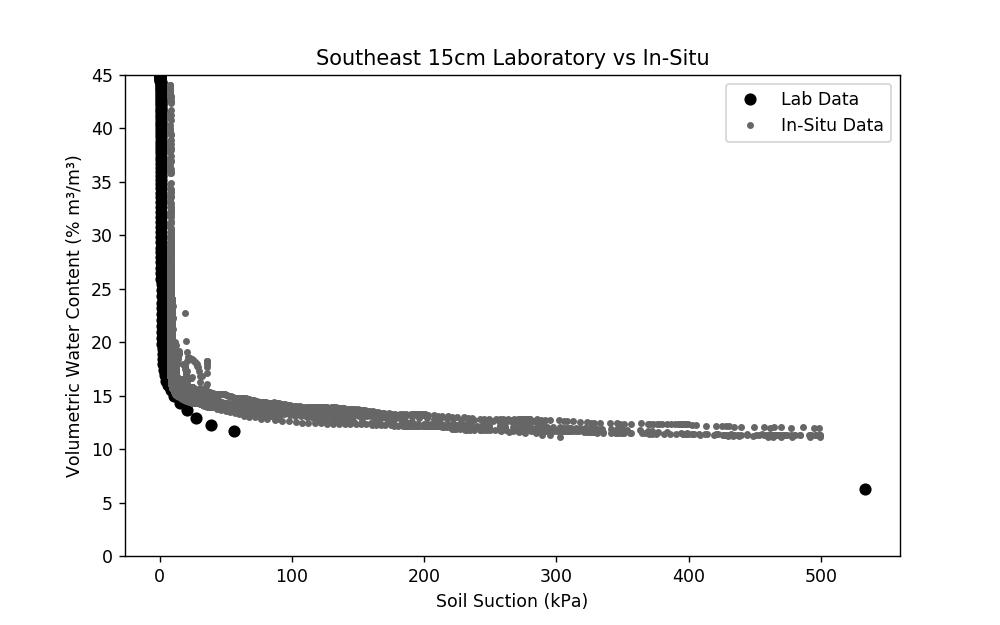

(0, 45)

In [53]:
fig = plt.figure(num=3,figsize=(8,5))
ax1 = fig.add_subplot(111)
ax1.plot(se15['Water Potential [kPa]'],se5['Water Content [Vol%]'],'o',label='Lab Data')
wetter_than_kPa = -df['SE 15cm Water Potential kPa'] < 500
hysteresis = (df['SE 15cm Water Potential kPa'].resample('D').mean().diff().resample('30T').pad()[df['SE 15cm Water Potential kPa'].index] <= 0) | (df['SE 15cm Volumetric Water Content m³/m³'].resample('D').mean().diff().resample('30T').pad()[df['SE 15cm Volumetric Water Content m³/m³'].index] <= 0)
x = -df['SE 15cm Water Potential kPa'][(wetter_than_kPa)&(hysteresis)]#.resample('D').mean()
y = 100*df['SE 15cm Volumetric Water Content m³/m³'][(wetter_than_kPa)&(hysteresis)]#.resample('D').mean()
ax1.plot(x,y,'.',label='In-Situ Data')
ax1.set_xlabel('Soil Suction (kPa)')
ax1.set_ylabel('Volumetric Water Content (% m³/m³)')
ax1.set_title('Southeast 15cm Laboratory vs In-Situ')

ax1.legend()
ax1.set_ylim(0,45)
#apply_meter_blue(fig)

#fig.savefig('C:\\Users\\Alton\\Desktop\\China Presentation Figures\\SE 15cm MRC.pdf')


# Southwest 6cm and South Center 6cm HYPROP

<IPython.core.display.Javascript object>


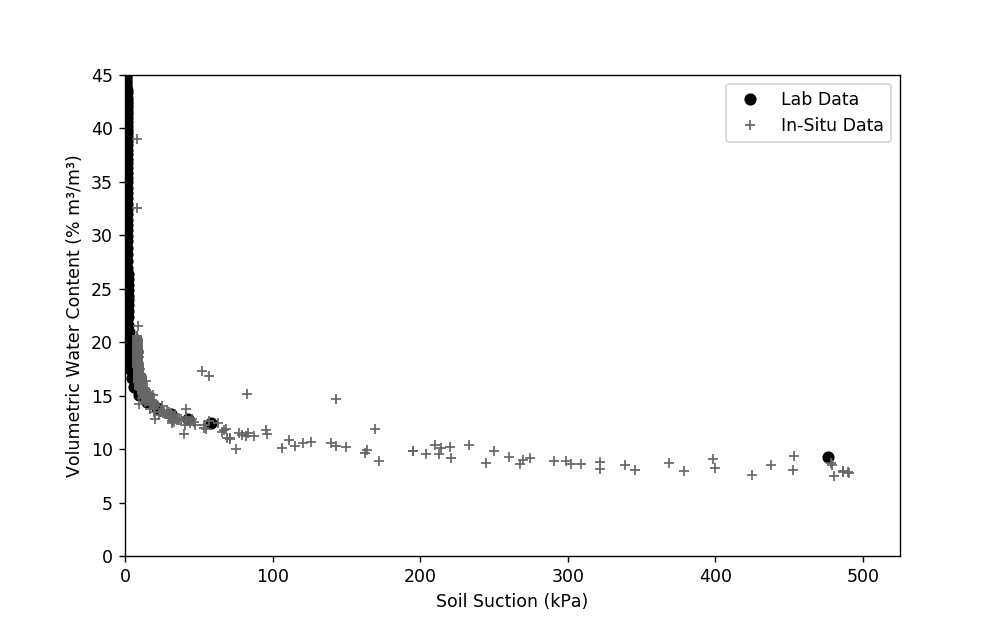

In [83]:
fig = plt.figure(num=4,figsize=(8,5))
ax1 = fig.add_subplot(111)
ax1.plot(sc5['Water Potential [kPa]'],sc5['Water Content [Vol%]'],'o',label='Lab Data')
wetter_than_kPa = -df['SW 6cm Water Potential kPa'] < 500
hysteresis = (df['SW 6cm Water Potential kPa'].diff() <= 0)

hyprop_linear_section_wp = sc5['Water Potential [kPa]'][sc5['Water Potential [kPa]']>=15]
hyprop_linear_section_wc = sc5['Water Content [Vol%]'][sc5['Water Potential [kPa]']>=15]

x = -df['SW 6cm Water Potential kPa'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()
y = 100*df['SW 6cm Volumetric Water Content m³/m³'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()
ax1.plot(x,y,'+',label='In-Situ Data')
ax1.set_xlabel('Soil Suction (kPa)')
ax1.set_ylabel('Volumetric Water Content (% m³/m³)')
#ax1.set_title('Southeast 6cm Laboratory vs In-Situ')
ax1.legend()
    
#apply_meter_blue(fig)
ax1.set_ylim(0,45)
ax1.set_xlim(0,525)
fig.savefig('C:\\Users\\Alton\\Desktop\\SW 5cm MRC.png',dpi=300)


# Southwest 15cm and South Center 15cm HYPROP

<IPython.core.display.Javascript object>


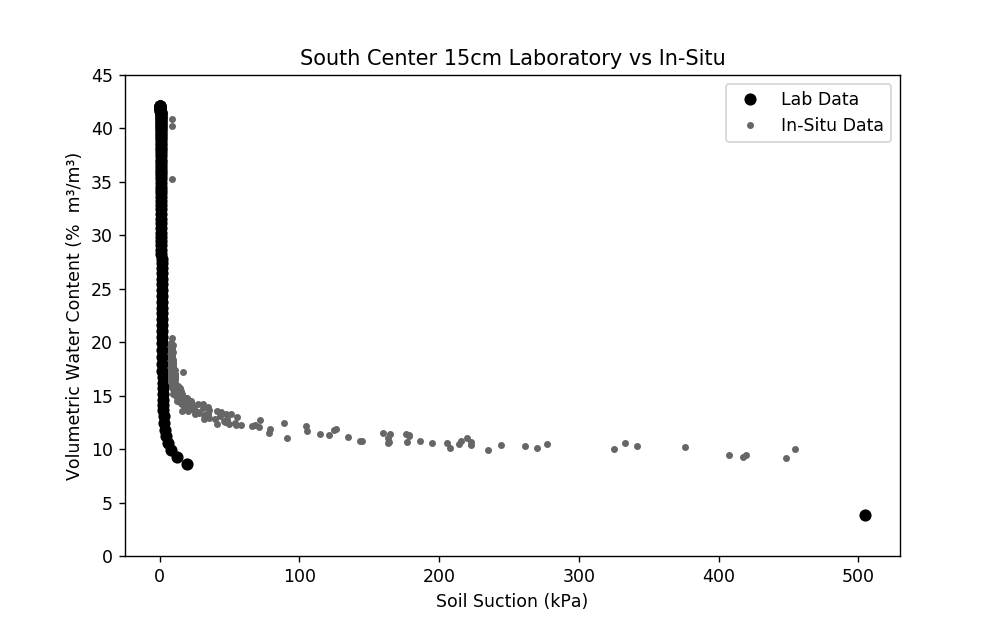

(0, 45)

In [29]:
fig = plt.figure(num=5,figsize=(8,5))
ax1 = fig.add_subplot(111)
ax1.plot(sc15['Water Potential [kPa]'],sc15['Water Content [Vol%]'],'o',label='Lab Data')
wetter_than_kPa = -df['SW 15cm Water Potential kPa'] < 500
hysteresis = (df['SW 15cm Water Potential kPa'].diff() <= 0)
x = -df['SW 15cm Water Potential kPa'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()
y = 100*df['SW 15cm Volumetric Water Content m³/m³'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()
ax1.plot(x,y,'.',label='In-Situ Data')
ax1.legend()   
ax1.set_xlabel('Soil Suction (kPa)')
ax1.set_ylabel('Volumetric Water Content (%  m³/m³)')
ax1.set_title('South Center 15cm Laboratory vs In-Situ')
#apply_meter_blue(fig)
ax1.set_ylim(0,45)

#fig.savefig('C:\\Users\\Alton\\Desktop\\China Presentation Figures\\SW 15cm MRC.pdf')


# In-Situ NE 5cm

<IPython.core.display.Javascript object>


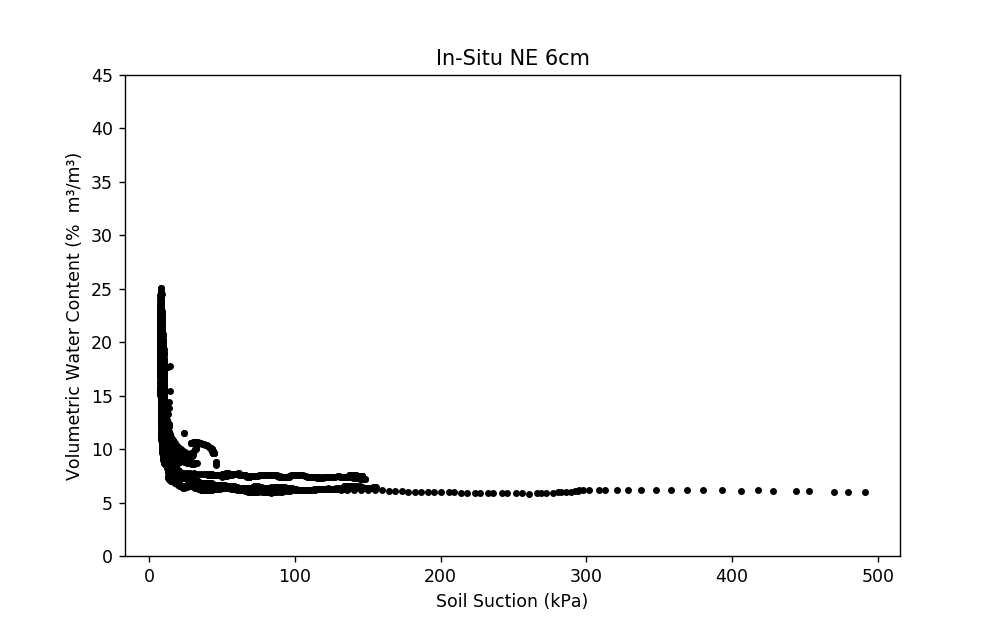

(0, 45)

In [42]:
fig = plt.figure(num=6,figsize=(8,5))
ax1 = fig.add_subplot(111)
#ax1.plot(sc15['Water Potential [kPa]'],sc15['Water Content [Vol%]'],'o')
wetter_than_kPa = -df['NE 6cm Water Potential kPa'] < 500
hysteresis = (df['NE 6cm Water Potential kPa'].diff() <= 0)
x = -df['NE 6cm Water Potential kPa'][(wetter_than_kPa)&(hysteresis)]#.resample('D').mean()
y = 100*df['NE 6cm Volumetric Water Content m³/m³'][(wetter_than_kPa)&(hysteresis)]#.resample('D').mean()
ax1.plot(x,y,'.')
#ax1.legend()   
ax1.set_xlabel('Soil Suction (kPa)')
ax1.set_ylabel('Volumetric Water Content (%  m³/m³)')
ax1.set_title('In-Situ NE 6cm')
#apply_meter_blue(fig)
ax1.set_ylim(0,45)

# In-Situ MRC NE 15cm

<IPython.core.display.Javascript object>


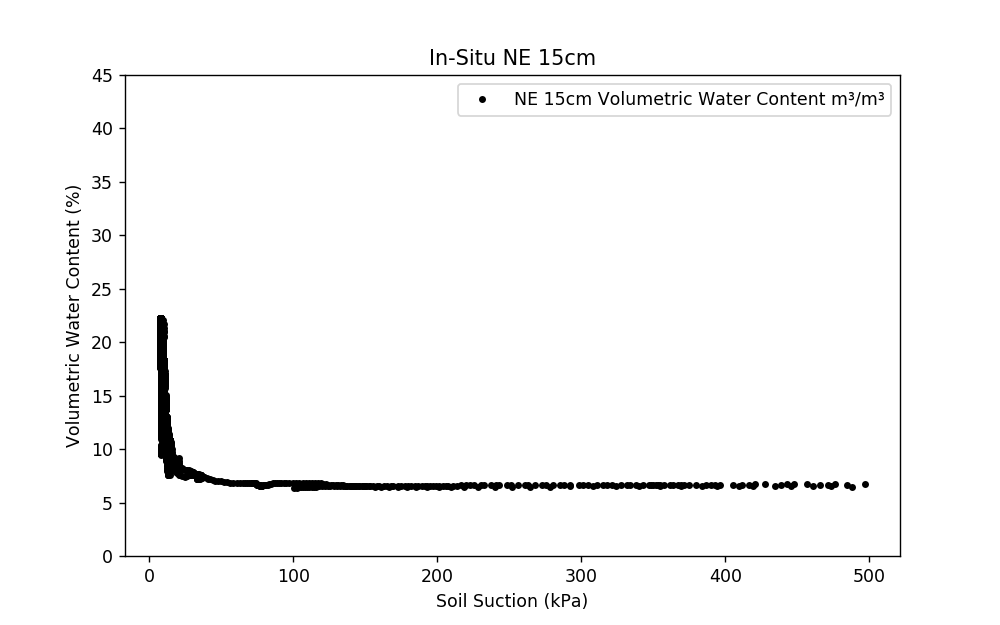

(0, 45)

In [33]:
fig = plt.figure(num=7,figsize=(8,5))
ax1 = fig.add_subplot(111)
#ax1.plot(sc15['Water Potential [kPa]'],sc15['Water Content [Vol%]'],'o')
wetter_than_kPa = -df['NE 15cm Water Potential kPa'] < 500
hysteresis = (df['NE 15cm Water Potential kPa'].diff() <= 0)
x = -df['NE 15cm Water Potential kPa'][(wetter_than_kPa)&(hysteresis)]#.resample('D').mean()
y = 100*df['NE 15cm Volumetric Water Content m³/m³'][(wetter_than_kPa)&(hysteresis)]#.resample('D').mean()
ax1.plot(x,y,'.')
ax1.legend()   
ax1.set_xlabel('Soil Suction (kPa)')
ax1.set_ylabel('Volumetric Water Content (%)')
ax1.set_title('In-Situ NE 15cm')
ax1.set_ylim(0,45)
#apply_meter_blue(fig)

# In-Situ MRC NW 6cm

<IPython.core.display.Javascript object>


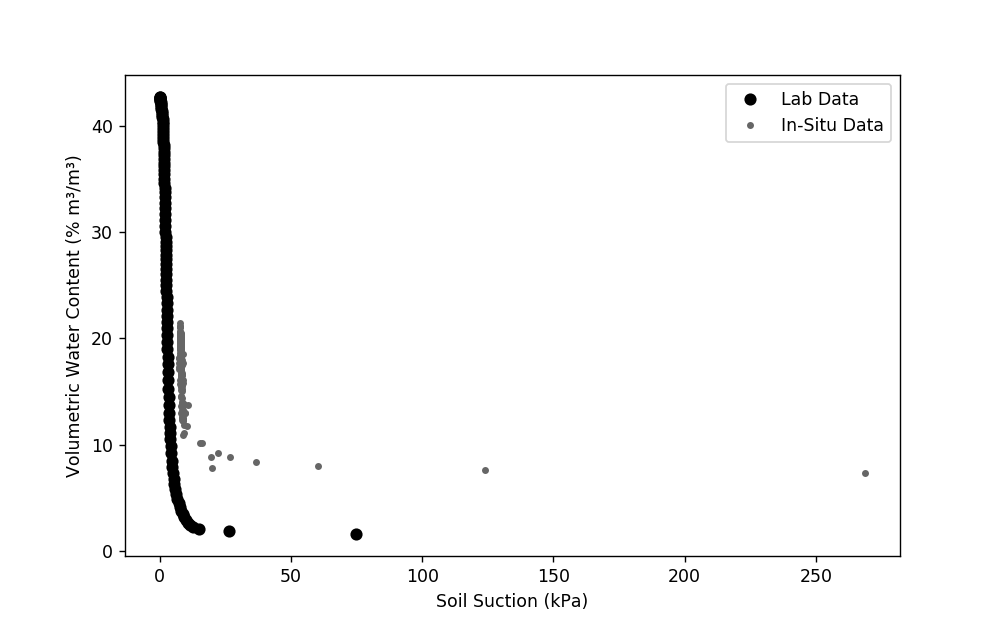

In [119]:
fig = plt.figure(num=88,figsize=(8,5))
ax1 = fig.add_subplot(111)

ax1.plot(nw5['Water Potential (kPa)'],nw5['Water Content [Vol%]'],'o',label='Lab Data')
wetter_than_kPa = -df['NW 6cm Water Potential kPa'] < 500
hysteresis = (df['NW 6cm Water Potential kPa'].diff() <= 0)
x = -df['NW 6cm Water Potential kPa'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()[:'2015-10']
y = 100*df['NW 6cm Volumetric Water Content m³/m³'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()[:'2015-10']
ax1.plot(x,y,'.',label='In-Situ Data')
ax1.legend()   
ax1.set_xlabel('Soil Suction (kPa)')
ax1.set_ylabel('Volumetric Water Content (% m³/m³)')
#ax1.set_title('In-Situ NW 6cm')
#ax1.set_xlim(0,300)
#apply_meter_blue(fig)
#fig.savefig('C:\\Users\\Alton\\Desktop\\NW 6cm HYPROP vs In-Situ.png',dpi=300)


# North plot depth comparison

<IPython.core.display.Javascript object>


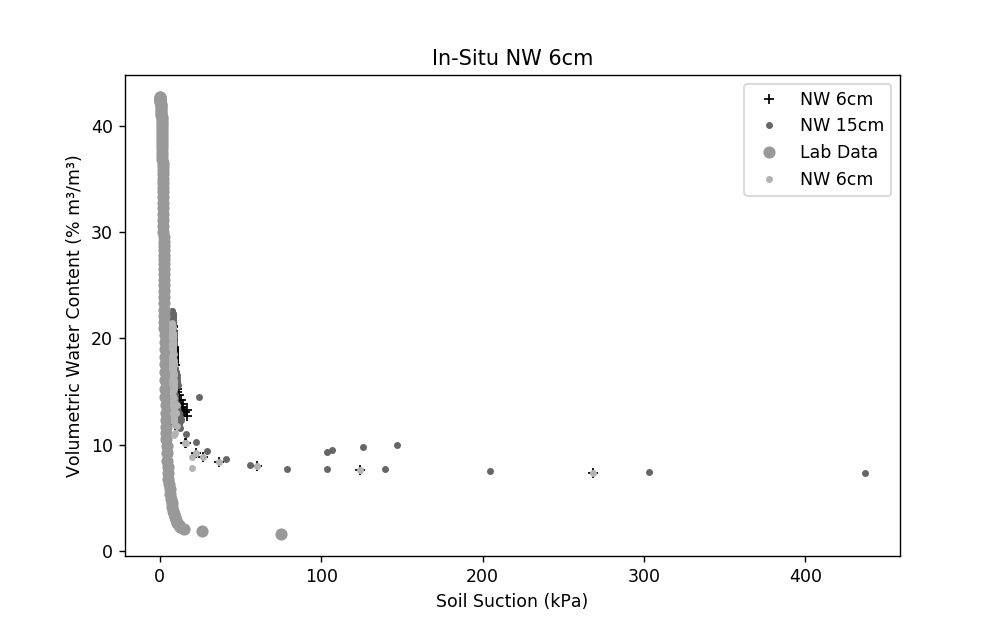

In [102]:
fig = plt.figure(num=8,figsize=(8,5))
ax1 = fig.add_subplot(111)

#ax1.plot(nw5['Water Potential (kPa)'],nw5['Water Content [Vol%]'],'o',label='Lab Data')
wetter_than_kPa = -df['NW 6cm Water Potential kPa'] < 500
hysteresis = (df['NW 6cm Water Potential kPa'].diff() <= 0)
x = -df['NW 6cm Water Potential kPa'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()['2015']
y = 100*df['NW 6cm Volumetric Water Content m³/m³'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()['2015']
ax1.plot(x,y,'+',label='NW 6cm')

wetter_than_kPa = -df['NW 15cm Water Potential kPa'] < 500
hysteresis = (df['NW 15cm Water Potential kPa'].diff() <= 0)
a = -df['NW 15cm Water Potential kPa'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()['2015']
b = 100*df['NW 15cm Volumetric Water Content m³/m³'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()['2015']
ax1.plot(a,b,'.',label='NW 15cm')

ax1.legend()   
ax1.set_xlabel('Soil Suction (kPa)')
ax1.set_ylabel('Volumetric Water Content (% m³/m³)')
ax1.set_title('In-Situ NW 6cm and 15cm')
#apply_meter_blue(fig)
fig.savefig('C:\\Users\\Alton\\Desktop\\In-Situ NW 6cm and 15cm.png')


# Year comparison to show reseeding

<IPython.core.display.Javascript object>


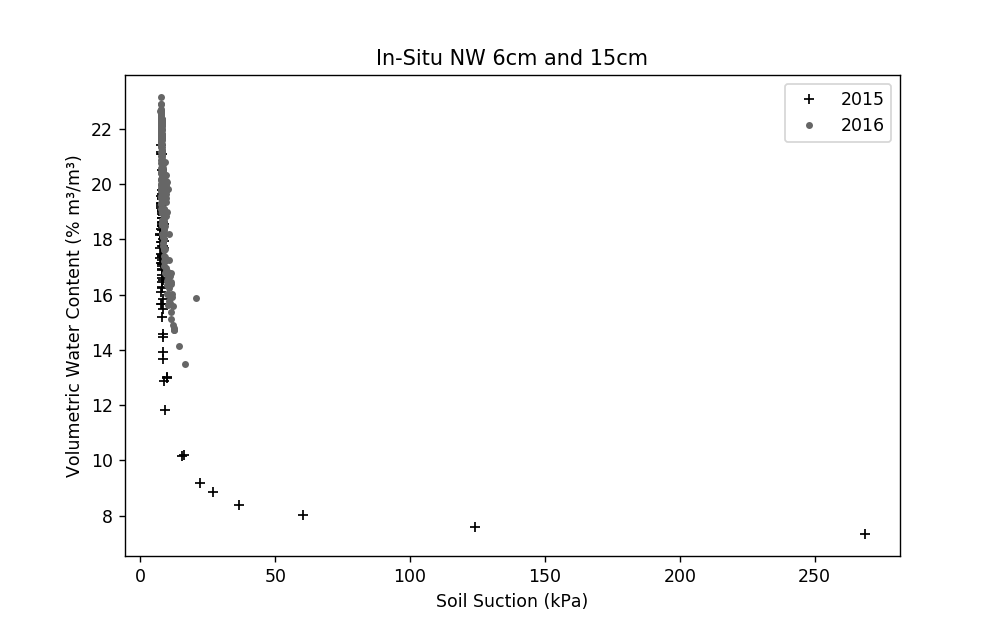

In [114]:
fig = plt.figure(num=31,figsize=(8,5))
ax1 = fig.add_subplot(111)

#ax1.plot(nw5['Water Potential (kPa)'],nw5['Water Content [Vol%]'],'o',label='Lab Data')
wetter_than_kPa = -df['NW 6cm Water Potential kPa'] < 500
hysteresis = (df['NW 6cm Water Potential kPa'].diff() <= 0)
x = -df['NW 6cm Water Potential kPa'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()['2015-1-1':'2015-9-10']
y = 100*df['NW 6cm Volumetric Water Content m³/m³'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()['2015-1-1':'2015-9-10']
ax1.plot(x,y,'+',label='2015')

wetter_than_kPa = -df['NW 6cm Water Potential kPa'] < 500
hysteresis = (df['NW 6cm Water Potential kPa'].diff() <= 0)
a = -df['NW 15cm Water Potential kPa'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()['2015-9-11':]
b = 100*df['NW 15cm Volumetric Water Content m³/m³'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()['2015-9-11':]
ax1.plot(a,b,'.',label='2016')

ax1.legend()   
ax1.set_xlabel('Soil Suction (kPa)')
ax1.set_ylabel('Volumetric Water Content (% m³/m³)')
ax1.set_title('In-Situ NW 6cm and 15cm')
#apply_meter_blue(fig)
fig.savefig('C:\\Users\\Alton\\Desktop\\Year comparison to show reseeding.png')


# In-Situ vs Predicted by soil type

<IPython.core.display.Javascript object>


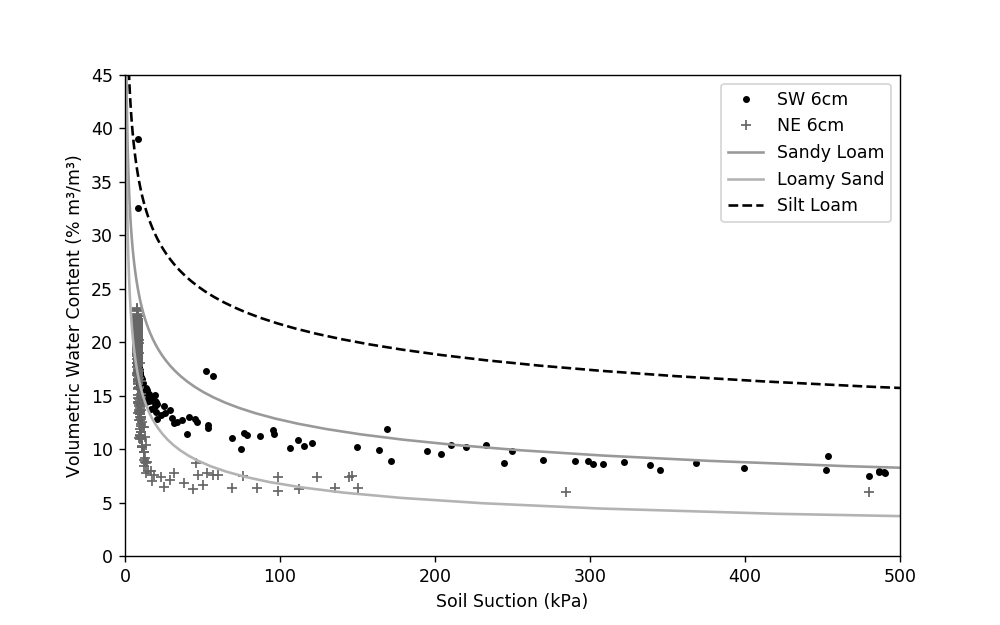

In [95]:
fig = plt.figure(num=9,figsize=(8,5))
ax1 = fig.add_subplot(111)
#ax1.plot(sc15['Water Potential [kPa]'],sc15['Water Content [Vol%]'],'o')
wetter_than_kPa = -df['SW 6cm Water Potential kPa'] < 500
hysteresis = (df['SW 6cm Water Potential kPa'].diff() <= 0)

x = -df['SW 6cm Water Potential kPa'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()['2015']
y = 100*df['SW 6cm Volumetric Water Content m³/m³'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()['2015']

wetter_than_kPa = -df['NW 6cm Water Potential kPa'] < 500
hysteresis = (df['NW 6cm Water Potential kPa'].diff() <= 0)

k = -df['NW 6cm Water Potential kPa'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()['2015']
j = 100*df['NW 6cm Volumetric Water Content m³/m³'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()['2015']

wetter_than_kPa = -df['SE 6cm Volumetric Water Content m³/m³'] < 500
hysteresis = (df['SE 6cm Water Potential kPa'].diff() <= 0)

l = -df['SE 6cm Volumetric Water Content m³/m³'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()['2015']
m = 100*df['SE 6cm Water Potential kPa'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()['2015']

wetter_than_kPa = -df['NE 6cm Water Potential kPa'] < 500
hysteresis = (df['NE 6cm Water Potential kPa'].diff() <= 0)

n = -df['NE 6cm Water Potential kPa'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()['2015']
o = 100*df['NE 6cm Volumetric Water Content m³/m³'][(wetter_than_kPa)&(hysteresis)].resample('D').mean()['2015']

#ax1.plot(k,j,'+',label='NW 6cm')
ax1.plot(x,y,'.',label='SW 6cm')
#ax1.plot(l,m,'*',label='SE 6cm')
ax1.plot(n,o,'+',label='NE 6cm')

def potential(theta,air_entry,th_saturation,b):
    return air_entry*(theta/th_saturation)**(-b)

theta = np.linspace(0.01,0.5,100)
loamy_sand = (-0.45,0.5,2.7)
sandy_loam = (-0.64,0.5,3.7)
silt_loam = (-1.54,0.5,5)

ax1.plot(-potential(theta,*sandy_loam),100*theta,'-',label='Sandy Loam')
ax1.plot(-potential(theta,*loamy_sand),100*theta,'-',label='Loamy Sand')
ax1.plot(-potential(theta,*silt_loam),100*theta,'--',label='Silt Loam')

ax1.legend()   
ax1.set_xlabel('Soil Suction (kPa)')
ax1.set_ylabel('Volumetric Water Content (% m³/m³)')
#ax1.set_title('NW In-Situ MRC')
ax1.set_ylim(0,45)
ax1.set_xlim(0,500)
#apply_meter_blue(fig)

fig.savefig('C:\\Users\\Alton\\Desktop\\NW vs SW with soils.png',dpi=300)


<IPython.core.display.Javascript object>


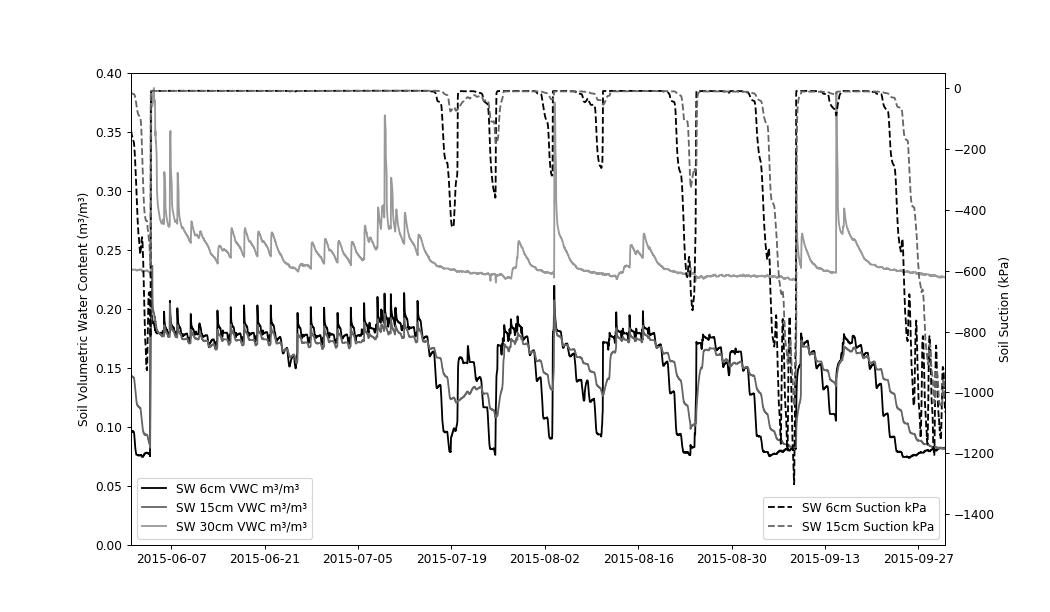

In [71]:
fig = plt.figure(num=10,figsize=(12,7),dpi=70)

rain = df['ECRN-100 Precipitation mm'].dropna()

y1=df['SW 6cm Volumetric Water Content m³/m³'].dropna()
y2=df['SW 15cm Volumetric Water Content m³/m³'].dropna()
y3=df['SW 30cm Volumetric Water Content m³/m³'].dropna()

y4=df['SW 6cm Water Potential kPa']
y5=df['SW 15cm Water Potential kPa']

ax1 = fig.add_subplot(111)
#ax1.set_title('Uncontrolled Effects')
ax1.plot(y1.index,y1,label='SW 6cm VWC m³/m³')
ax1.plot(y2.index,y2,label='SW 15cm VWC m³/m³')
ax1.plot(y3.index,y3,label='SW 30cm VWC m³/m³')
ax1.set_ylabel('Soil Volumetric Water Content (m³/m³)')
ax1.legend(loc='lower left')
ax1.set_ylim(0,0.4)

#ySW6 = df['SW 6cm Volumetric Water Content m³/m³'].resample('D').max() - df['SW 6cm Volumetric Water Content m³/m³'].resample('D').min() # %VWC change per day
#ax1.plot(ySW6.index,ySW6)

#ax1.xaxis.set_major_formatter(formatter)
#ax1.xaxis.set_major_locator(monthlocator)
#ax1.xaxis.set_minor_locator(weeklocator)
#ax1.set_xlim('2015-06','2015-08')

ax2 = ax1.twinx()
ax2.plot(y4.index,y4,'--',label='SW 6cm Suction kPa')
ax2.plot(y5.index,y5,'--',label='SW 15cm Suction kPa')
ax2.set_ylabel('Soil Suction (kPa)')
ax2.set_ylim(-1500,50)
ax2.legend(loc='lower right')
#ax1.set_xlim(rain.index[0],rain.index[-1])
#ax2.set_xlim(rain.index[0],rain.index[-1])

#apply_meter_blue(fig)
ax1.set_xlim('2015-06-01','2015-10-01')

fig.savefig('C:\\Users\\Alton\\Desktop\\VWC Jun 1-Oct 1.png', dpi=300)


# ETo Adjusted Change in Water Content

<IPython.core.display.Javascript object>


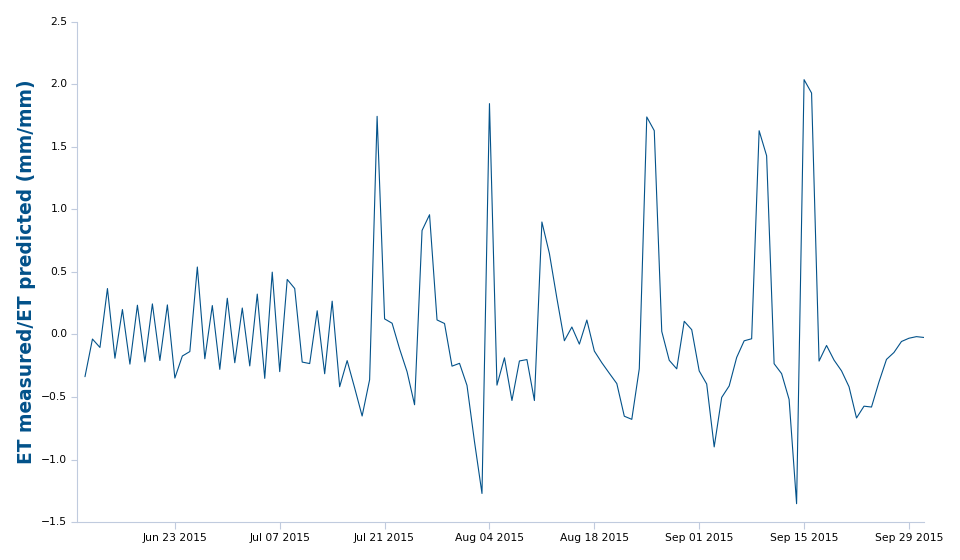

In [15]:
fig = plt.figure(num=12,figsize=(12,7))
ax1 = fig.add_subplot(111)

#(O*d + O*d)/ET = %ET

t1=df['2015-06-10':'2015-10-01']['SW 6cm Volumetric Water Content m³/m³'].resample('D').asfreq().diff()

t2=df['2015-06-10':'2015-10-01']['SW 15cm Volumetric Water Content m³/m³'].resample('D').asfreq().diff()

#t1 is 60 mm deep. t2 is 90mm deep.
t1 = t1*60
t2 = t2*90

ttotal = t1+t2

###################################################################################################
h_r = df['VP-3 Humidity RH'].resample('H').mean() #relative humidity
R_n = df['PYR Solar Radiation W/m²'].resample('H').mean() #net radiation
u = df['DS-2 Average Wind m/s'].resample('H').mean() #wind speed
A = 1405.8 #altitude in meters
g_v = (0.6*0.2*u)/(0.6+0.2*u) #vapor conductance
psychrometer_const = 6.66*10.0**(-4.0)
gamma_star = psychrometer_const*(1+(u/3.0)) #apparent psychrometer const
epsilon_s = 0.97 #surface emissivity from 0 to 1
sigma = 5.67*10**-8 #Stefan-Boltzmann constant
G =  #soil heat flux density (10% of R_n)
P_a = 101.3*math.exp(-1*A/8200) #atmospheric pressure
a,b,c = 0.611,17.502,240.97 #biophysical constants

delta = (b*c*e_s)/(c+T)**2 #slope of saturation vp
s = delta/P_a #slope of saturation mole fraction

e_s = a*np.exp(b*T/(c+T))
e_a = e_s*h_r
D = e_s - e_a #vapor deficit of air
slope_saturation_vp = e_s*(17.269/(237.3+T))*(1-(T/(237.3+T)))


et = (s*(R_abs-epsilon_s*sigma*T**4-G)+gamma_star*lambd*g_v*D/P_a)/(s+gamma_star)
percent_et = ttotal/#ET

ax1.plot(percent_et)
ax1.set_ylabel('ET measured/ET predicted (mm/mm)')
ax1.set_xlim('2015-06-10','2015-10-01')

apply_meter_blue(fig)

In [11]:
df.columns

Index(['SRS-Ni 630 nm', 'SRS-Ni 800 nm', 'S SRS-Pr 532 nm', 'S SRS-Pr 570 nm',
       'S SRS-Nr 630 nm', 'S SRS-Nr 800 nm', 'SRS-Pi 532 nm', 'SRS-Pi 570 nm',
       'N SRS-Pr 532 nm', 'N SRS-Pr 570 nm', 'N SRS-Nr 630 nm',
       'N SRS-Nr 800 nm', 'SW 6cm EC mS/cm', 'SW 6cm Temp °C',
       'SW 6cm Volumetric Water Content m³/m³', 'SW 6cm Water Potential kPa',
       'SW 6cm Temp °C.1', 'SW 15cm EC mS/cm', 'SW 15cm Temp °C',
       'SW 15cm Volumetric Water Content m³/m³', 'SW 15cm Water Potential kPa',
       'SW 15cm Temp °C.1', 'SW 30cm EC  mS/cm', 'SW 30cm Temp °C',
       'SW 30cm Volumetric Water Content m³/m³', 'SE 6cm EC mS/cm',
       'SE 6cm Temp °C', 'SE 6cm Temp °C.1',
       'SE 6cm Volumetric Water Content m³/m³', 'SE 6cm Water Potential kPa',
       'SE 6cm Temp °C.2', 'SE 6cm Temp °C.3', 'SE 15cm EC mS/cm',
       'SE 15cm Temp °C', 'SE 15cm Temp °C.1',
       'SE 15cm Volumetric Water Content m³/m³', 'SE 15cm Water Potential kPa',
       'SE 15cm Temp °C.2', 'SE 15cm T

# NDVI from Jun 13-22, Jul 14-21, Sept 1 - 10, 2015

<IPython.core.display.Javascript object>


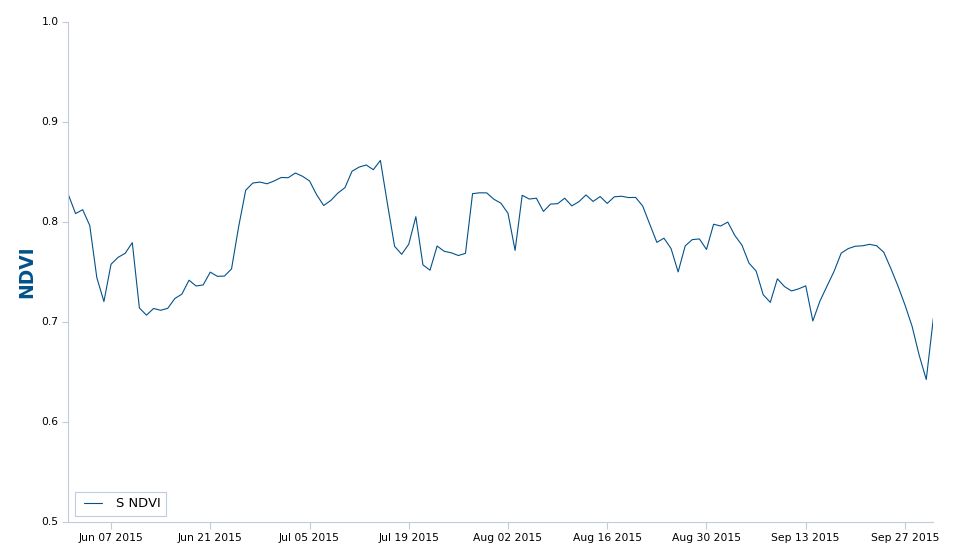

In [35]:
fig = plt.figure(num=13,figsize=(12,7))
ax1 = fig.add_subplot(111)

sun_above_75 = df['Solar Zenith Angle'] < 75
NDVI = df['S NDVI'][sun_above_75].resample('D').mean()
ax1.plot(NDVI)
#ax2 = ax1.twinx()
#ax2.plot(df['SE 6cm Water Potential kPa']['2015-06':'2015-11'])
ax1.set_ylabel('NDVI')

ax1.set_ylim(0.5,1)
ax1.legend(loc='lower left')
ax1.set_xlim('2015-06-01','2015-10-01')
apply_meter_blue(fig)

#fig.savefig('C:\\Users\\Alton\\Desktop\\NDVI Jun 1-Oct 1.png', dpi=300)


<IPython.core.display.Javascript object>


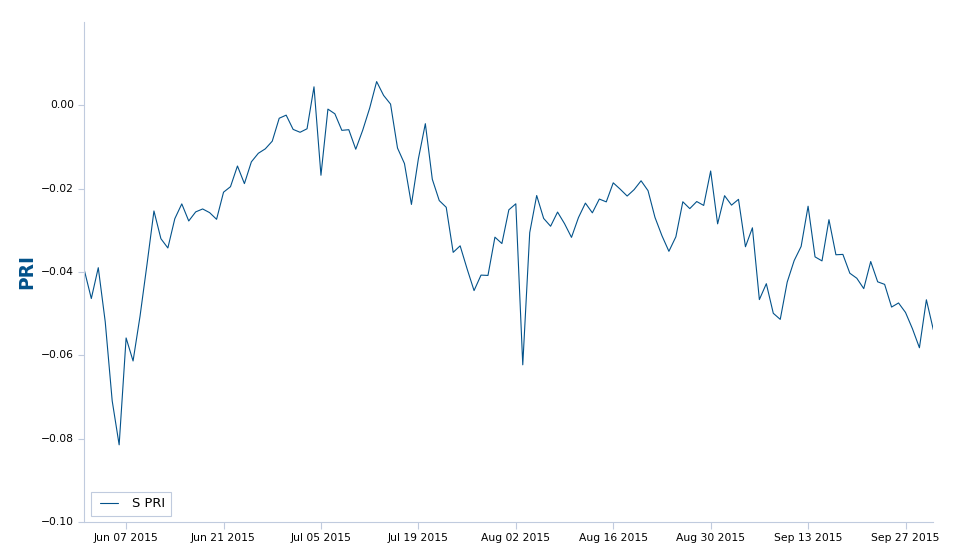

In [34]:
fig = plt.figure(num=14,figsize=(12,7))
ax1 = fig.add_subplot(111)

sun_above_75 = df['Solar Zenith Angle'] < 75
PRI = df['S PRI'][sun_above_75].resample('D').mean()
ax1.plot(PRI)
#ax2 = ax1.twinx()
#ax2.plot(df['SE 6cm Water Potential kPa']['2015-06':'2015-11'])
ax1.set_ylabel('PRI')

ax1.set_ylim(-0.1,0.02)
ax1.legend(loc='lower left')
ax1.set_xlim('2015-06-01','2015-10-01')
apply_meter_blue(fig)

#fig.savefig('C:\\Users\\Alton\\Desktop\\PRI Jun 1-Oct 1.png', dpi=300)

In [34]:
df['SW 6cm Volumetric Water Content m³/m³'].diff()['2015-06']/30*(24*60)

Date/Time
2015-06-01 00:00:00    0.000000
2015-06-01 00:30:00    0.000000
2015-06-01 01:00:00   -0.028070
2015-06-01 01:30:00    0.000000
2015-06-01 02:00:00    0.000000
2015-06-01 02:30:00    0.000000
2015-06-01 03:00:00    0.028070
2015-06-01 03:30:00    0.000000
2015-06-01 04:00:00   -0.028070
2015-06-01 04:30:00    0.000000
2015-06-01 05:00:00    0.000000
2015-06-01 05:30:00    0.000000
2015-06-01 06:00:00    0.000000
2015-06-01 06:30:00    0.028070
2015-06-01 07:00:00   -0.028070
2015-06-01 07:30:00    0.000000
2015-06-01 08:00:00    0.000000
2015-06-01 08:30:00    0.000000
2015-06-01 09:00:00    0.000000
2015-06-01 09:30:00   -0.028096
2015-06-01 10:00:00   -0.028121
2015-06-01 10:30:00   -0.028147
2015-06-01 11:00:00   -0.056372
2015-06-01 11:30:00   -0.056475
2015-06-01 12:00:00   -0.084906
2015-06-01 12:30:00   -0.085139
2015-06-01 13:00:00   -0.085372
2015-06-01 13:30:00   -0.085606
2015-06-01 14:00:00   -0.057200
2015-06-01 14:30:00   -0.057305
                         ...  